In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Task 1

In [12]:
image = cv2.imread("/kaggle/input/images/image1.jpeg", cv2.IMREAD_GRAYSCALE)

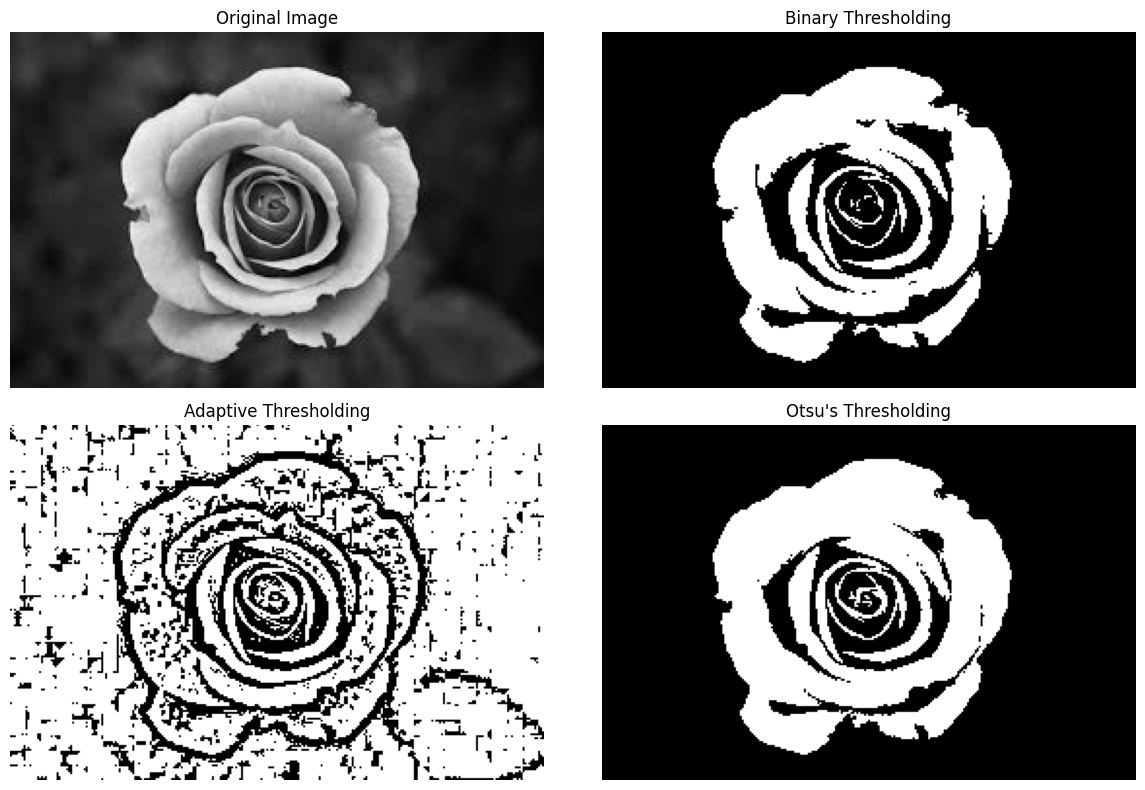

In [13]:

def apply_thresholds(img):
    """Apply different thresholding techniques to the image."""
    _, binary_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                            cv2.THRESH_BINARY, 11, 2)
    _, otsu_thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return [binary_thresh, adaptive_thresh, otsu_thresh]

def plot_thresholds(img, processed_imgs, titles):
    """Plot the original image and thresholded images."""
    a = [img] + processed_imgs
    plt.figure(figsize=(12, 8))
    for i, (P, title) in enumerate(zip(a, titles)):
        plt.subplot(2, 2, i + 1)
        plt.imshow(P, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load and process the image
# image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path
titles = ['Original Image', 'Binary Thresholding', 'Adaptive Thresholding', "Otsu's Thresholding"]
thresholded_imgs = apply_thresholds(image)

# Plot results
plot_thresholds(image, thresholded_imgs, titles)


Among these three methods of thresholding, adaptive thresholding is the most effective one. It gives us the most clear edges and the most accurate results. Otsu's method is the second best, but it does not give the details that adaptive thresholding gives. Simple thresholding is the worst of the three methods. It gives us the least clear edges and the least accurate results.

### Task 2

In [14]:
image = cv2.imread("/kaggle/input/images/image2_2.jpg", cv2.IMREAD_COLOR)

_, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

In [11]:
image.shape

(350, 612, 3)

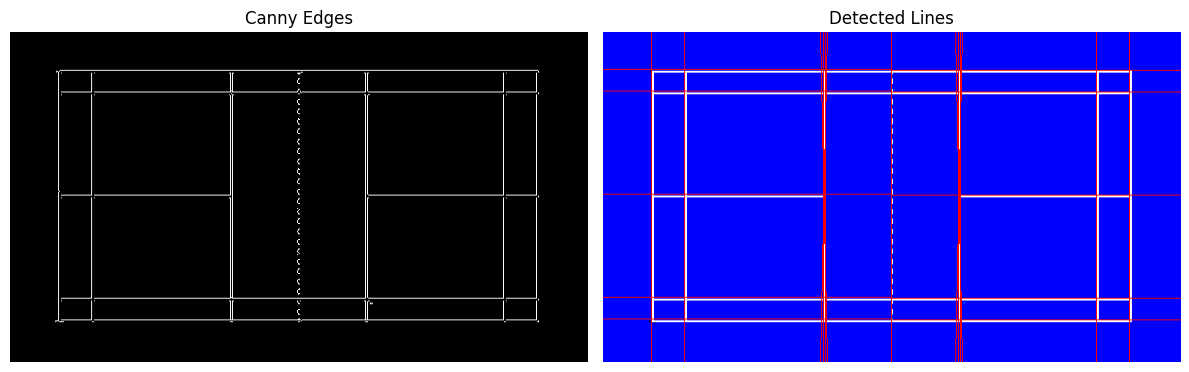

In [15]:

def detect_and_highlight_lines(img, rho=1, theta=np.pi / 180, threshold=80):
    """
    Detects and highlights lines in an image using Hough Line Transform.
    Args:
        img (numpy.ndarray): Input image.
        rho (float): Distance resolution of the accumulator in pixels.
        theta (float): Angle resolution of the accumulator in radians.
        threshold (int): Accumulator threshold for line detection.

    Returns:
        tuple: Result image with lines highlighted and edges detected.
    """
    if len(img.shape) > 2:  # Convert to grayscale if the image is colored
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img

    edges = cv2.Canny(gray, 50, 150, apertureSize=3)  # Detect edges
    lines = cv2.HoughLines(edges, rho, theta, threshold)  # Detect lines

    result_img = img.copy()
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
            x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
            cv2.line(result_img, (x1, y1), (x2, y2), (0, 0, 255), 1)

    return result_img, edges

def plot_results(edges, result_img):
    """
    Plots the detected edges and lines.
    Args:
        edges (numpy.ndarray): Edges detected using Canny.
        result_img (numpy.ndarray): Image with highlighted lines.
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Lines')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# Detect lines and edges
result_image, edges = detect_and_highlight_lines(image)

# Plot the results
plot_results(edges, result_image)


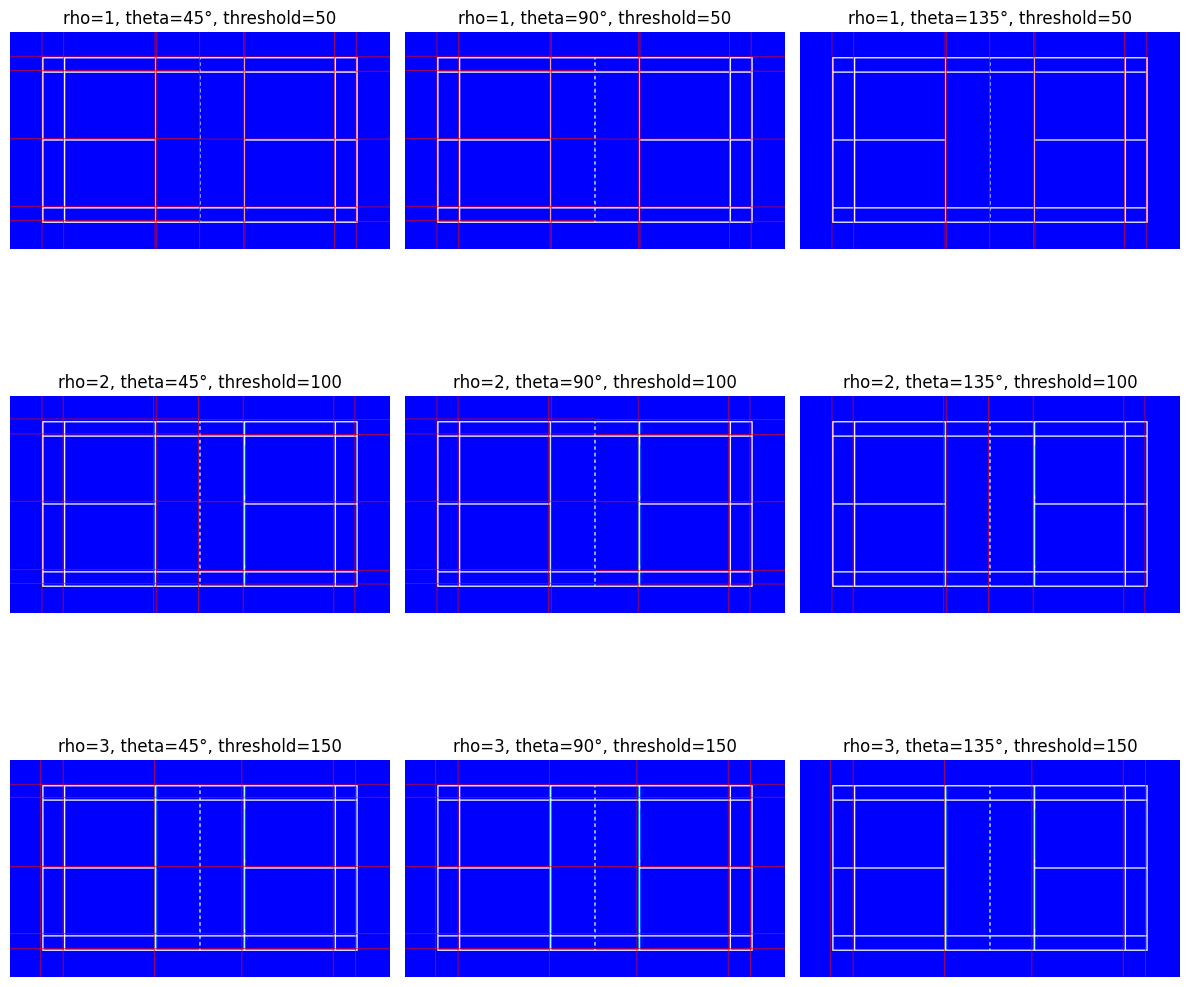

In [16]:

def plot_grid_results(img, rho_vals, theta_vals, threshold_vals):
    """
    Plots a grid of results for different Hough Line Transform parameters.
    Args:
        img (numpy.ndarray): Input image.
        rho_vals (list): List of rho values.
        theta_vals (numpy.ndarray): Array of theta values in radians.
        threshold_vals (list): List of threshold values.
    """
    plt.figure(figsize=(12, 12))
    for i, rho in enumerate(rho_vals):
        for j, theta in enumerate(theta_vals):
            result_img, _ = detect_and_highlight_lines(img, rho, theta, threshold_vals[i])
            plt.subplot(len(rho_vals), len(theta_vals), len(theta_vals) * i + j + 1)
            plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
            plt.title(f"rho={rho}, theta={np.degrees(theta):.0f}°, threshold={threshold_vals[i]}")
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Define parameter ranges
rho = [1, 2, 3]
theta = np.pi / 180 * np.array([45, 90, 135])
threshold = [50, 100, 150]

# Load the image
# image = cv2.imread('image.jpg')  # Replace with your image path

# Plot results for varying parameters
plot_grid_results(image, rho, theta, threshold)


The parameters of the HoughLines function are rho, theta, and threshold. The rho parameter is the distance resolution of the accumulator in pixels. The theta parameter is the angle resolution of the accumulator in radians. The threshold parameter is the minimum number of intersections to detect a line. Increasing the threshold value will result in fewer lines being detected, while increasing the rho and theta values will result in more lines being detected, as seen in the results of the code.

### Task 3

In [15]:
image = cv2.imread("/kaggle/input/images/image3.jpg", cv2.IMREAD_COLOR)

In [16]:
def detect_circles(image, minDist=30, cannyThresh=50, accThresh=30):# -> Any:
    if len(image.shape) > 2:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=minDist,
        param1=cannyThresh,
        param2=accThresh,
        minRadius=0,
        maxRadius=100
    )

    result_image = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            cv2.circle(result_image, center, radius, (0, 255, 0), 2)
            cv2.circle(result_image, center, 2, (255, 0, 0), 3)

    return result_image


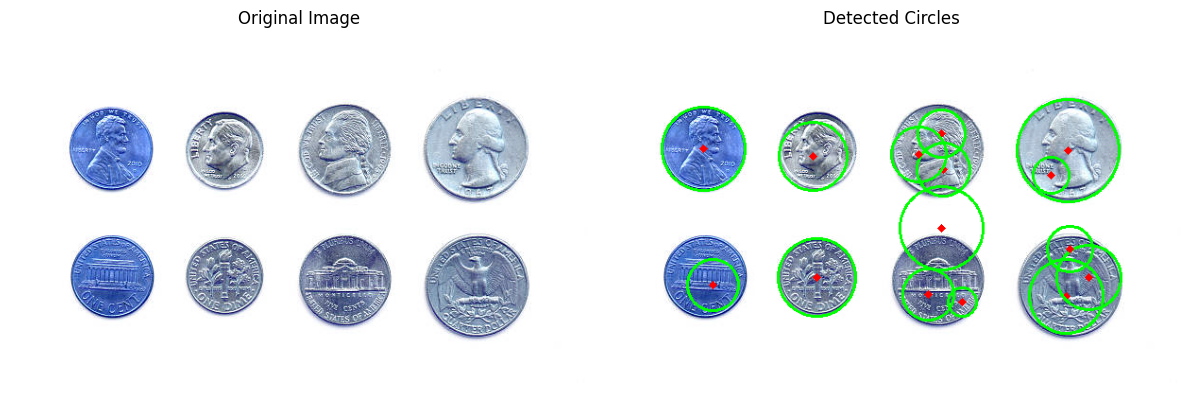

In [17]:
result_image = detect_circles(image)

    # Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title('Detected Circles')
plt.axis('off')

plt.tight_layout()
plt.show()

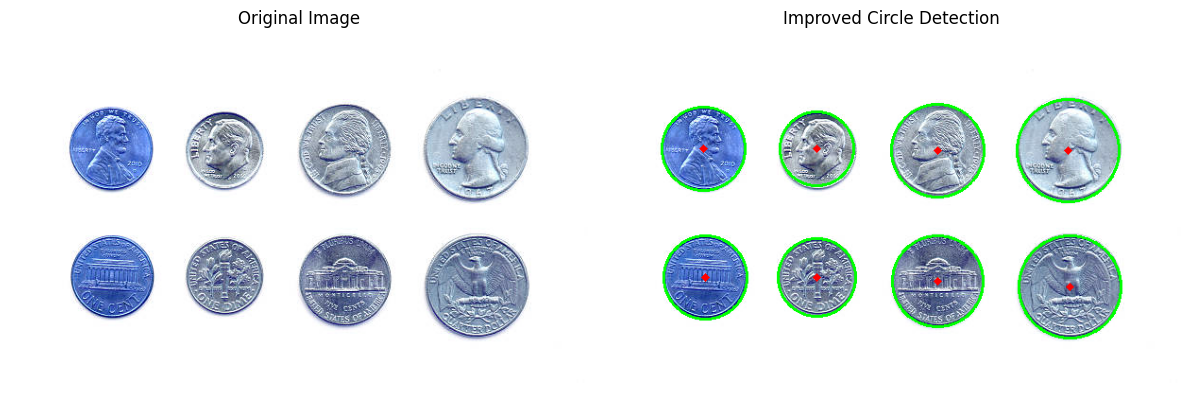

In [18]:
result_image = detect_circles(image, minDist=40, cannyThresh=200, accThresh=45)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title('Improved Circle Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

The circles are detected very well using the new parameters due to the increased canny threshold and decreased accumulator threshold. The increased canny threshold helps in detecting the edges of the circles more accurately, while the decreased accumulator threshold helps in detecting the circles more accurately by reducing the number of false positives.

### Task 4

In [6]:
img4 = cv2.imread("/kaggle/input/images/image4_4.jpg", cv2.IMREAD_COLOR)

In [7]:
def harris_corner_detection(image, k=0.04, block_size=2, aperture_size=3, threshold=0.01):
    if len(image.shape) > 2:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # Convert image to float32 for corner detection
    gray = np.float32(gray)

    # Apply Harris Corner Detection
    dst = cv2.cornerHarris(gray, block_size, aperture_size, k)

    # Dilate the result to mark the corners
    dst = cv2.dilate(dst, None)

    # Mark corners on the original image (we use a red color for marking)
    img_with_corners = image.copy()
    img_with_corners[dst > threshold * dst.max()] = [0, 0, 255]  # Red for corners

    return img_with_corners

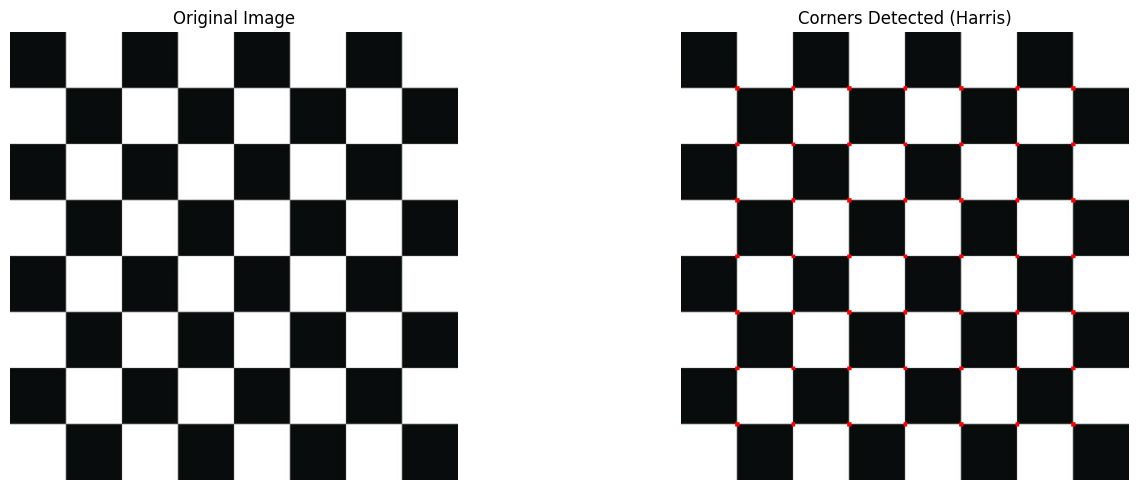

In [8]:
# Apply Harris Corner Detection
img_with_corners = harris_corner_detection(img4)

# Display the original image and image with corners marked
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Corners Detected (Harris)")
plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()


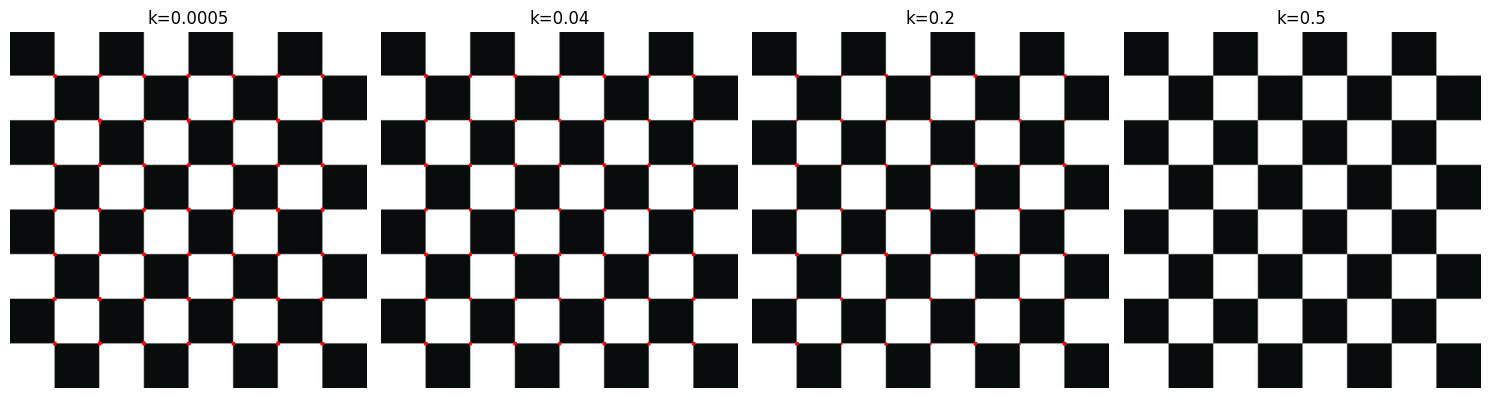

In [9]:
k_values = [0.0005, 0.04, 0.2, 0.5]  # Different values for the sensitivity parameter k

plt.figure(figsize=(15, 5))
idx = 1

# Loop through all k values
for k in k_values:
    img_with_corners = harris_corner_detection(img4, k=k, block_size=2, aperture_size=3, threshold=0.01)
    
    # Display the results in a 1x4 grid
    plt.subplot(1, 4, idx)
    plt.title(f"k={k}")
    plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    idx += 1

plt.tight_layout()
plt.show()

The k parameter in Harris Corner Detection controls the balance between corner strength and edge strength. Smaller k values prioritize corner strength, leading to more corner detections, including false positives. Larger k values prioritize edge strength, resulting in fewer but more robust corner detections. The optimal k value depends on image characteristics and desired corner density.

### Task 5

The Hough Transform detects geometric shapes by mapping points from image space to parameter space, accumulating votes in a discrete grid. 

- **For lines**: The transform uses the slope-intercept form \(y = mx + b\) or the polar form $(\rho, \theta)$, requiring a 2D parameter space. Each edge point votes for multiple $(\rho, \theta)$ combinations, forming sinusoidal curves in parameter space.

- **For circles**: The parameter space expands to 3D: $(x_c, y_c, r)$, representing the circle's center and radius. Each edge point votes for potential centers $(x_c, y_c)$ over varying radii, significantly increasing computational complexity.

While line detection involves simpler accumulation in 2D, circle detection's 3D parameter space demands more memory and computation. Optimizations like fixed-radius searches or the Hough Gradient method can improve efficiency for detecting circles.
